In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt
import re
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from skimage.color import rgb2gray


# A few notes

* I have used the data that Line posted 
* The notebook is a bit messy at the moment
* We need to add nmf and maybe Archtype Analysis. The nmf should be spot on for images and can extract different features that define a face. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
* Archtype Analysis can extract extreme features out of a face. 
* There is an implementation of nmf that we can try out. 
* I got the reconstruction of faces dependent on the number pc's to work :-)
* I dont see an implementation of Archtype Analysis in sklearn
* There is an implementation in sklearn of FastICA, but I dont think it is relevant for our images
* I am using Anaconda and the only package you need to install is : pip install scikit-image
* I have standardized the data (x-mu)/std. In the book they only do X-mu. We can have a look at that. 
* There is a python package that might be interesting to use : https://panel.holoviz.org/ this allows us to make wigdets in a notebook
* Interesting analysis: 
    * Can we see a difference in the features over age ?
    * Can we see a difference in features between sex?
    * Can we see a smile ? Sadness in features ? (Do all the images smile?). 
    * Other ?


In [2]:
def load_images(folder):
    images = []
    #agelabel=[]
    #genderlabel=[]
    #s=0
    for filename in range(len(os.listdir(folder))):
        #print(filename)
        img = mpimg.imread(os.path.join(folder, str(filename)+'.jpg'))
        if img is not None:
            images.append(img)
            #print(filename)
            #agelabel.append(filename.split("_",1)[0])
            #print(filename.split("_",2)[1])
            #genderlabel.append(filename.split("_",2)[1])
            #s=s+1
    return images

In [3]:
link='/Users/Soren.Johansenc3.ai/Library/CloudStorage/OneDrive-Personal/FleksMaster/ComputationalDataAnalysis/Usecase2/data/Faces/'

In [4]:
range(len(os.listdir(link)))

range(0, 23705)

In [5]:
dataimg=load_images(link)

In [6]:
len(dataimg)

23705

In [226]:
link1='/Users/Soren.Johansenc3.ai/Library/CloudStorage/OneDrive-Personal/FleksMaster/ComputationalDataAnalysis/Usecase2/data/labels.csv'

In [227]:
labels=pd.read_csv(link1,header=None)

In [228]:
labels.columns=['Age','Gender','Race']

In [229]:
Age=labels.Age.copy()
# Gender=labels.Gender.copy()
# Race=labels.Race.copy()

In [230]:
Gender=labels.Gender.copy()

In [15]:
Race=labels.Race.copy()

In [16]:
Age.shape

(23705,)

In [17]:
dataimg=np.array(dataimg)

In [18]:
# number of images, height, width and RGB - (Height, Width, Channel)
dataimg.shape

(23705, 200, 200, 3)

In [19]:
dataimg.shape[0]*dataimg.shape[1]*dataimg.shape[2]

948200000

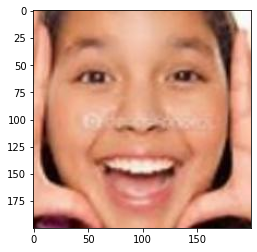

In [20]:
plt.imshow(dataimg[23704])

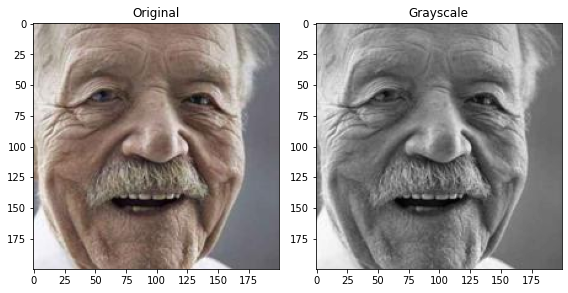

In [21]:
#import matplotlib.pyplot as plt

#from skimage import data


original = dataimg[0]
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()


In [22]:
graydata = rgb2gray(dataimg)

In [23]:
graydata.shape

(23705, 200, 200)

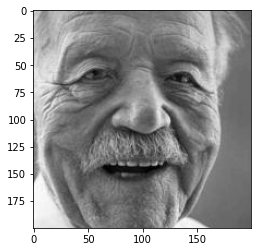

In [24]:
plt.imshow(graydata[0],cmap=plt.cm.gray)

In [25]:
Age

0        100
1        100
2        100
3        100
4        100
        ... 
23700      9
23701      9
23702      9
23703      9
23704      9
Name: Age, Length: 23705, dtype: int64

In [26]:
#datafull=dataimg.reshape(-1,3)

In [27]:
# shape of data is now 200* 200 * 23705 long and 3 features R G B.
#datafull.shape

In [28]:
#data0=dataimg.reshape(-1,40000,3)

In [29]:
#data0.shape

In [30]:
#data0_red=data0[:,:,0]
#data0_green=data0[:,:,1]
#data0_blue=data0[:,:,2]

In [31]:
#data0_red.shape

# Descriptive Statistics of the Data

In [317]:
sex.value_counts()

male      12391
female    11314
Name: sex, dtype: int64

In [338]:
#age_sorted=np.sort(Age.astype('float'))
fig = px.histogram(Age.astype('float'), color=sex, title='Histogram Age & Sex')
fig.show()

# PCA method
* Data is correlated see presentation from Line
* How to structure the data
* Remember to mean center the data
* The output of the pca interpretation
* Other pca method

In [32]:
#pca=PCA(n_components=3)
#pca_img=pca.fit_transform(testpicnew)

In [33]:
#blue_pic=testpic[:,:,2]

In [34]:
#blue_pic.shape

In [28]:
def center_scale(data):
    data_std=data.std(0)
    datacenter=(data-data.mean(0))/data_std
    return datacenter

#blue_std=blue_pic.std(0)
#blue_pic_center=(blue_pic-blue_pic.mean(0))/blue_std

In [32]:
#graydata_center=center_scale(graydata)
graydata_center=graydata-graydata.mean(0)

In [33]:
gray_nmf=graydata.reshape(-1,40000)

In [34]:
gray_nmf.shape

(23705, 40000)

In [35]:
newdata=graydata_center.reshape(-1,40000)

In [36]:
# There is a dependency between n_batches and n_components. 

n_batches=100

inc_pca = IncrementalPCA(n_components=235, batch_size=n_batches)
for x_batch in tqdm(np.array_split(newdata,n_batches)):
    inc_pca.partial_fit(x_batch)



100%|█████████████████████████████████████████| 100/100 [07:06<00:00,  4.27s/it]


In [37]:
ratio_var=inc_pca.explained_variance_ratio_

In [38]:
#print(inc_pca.explained_variance_)

In [39]:
#print(ratio_var)

In [40]:
np.cumsum(ratio_var)

array([0.28491071, 0.4145669 , 0.54218452, 0.58751838, 0.62062858,
       0.64859046, 0.66969497, 0.68702512, 0.70376037, 0.7180778 ,
       0.73169431, 0.74107003, 0.74966447, 0.75781904, 0.76566777,
       0.77334251, 0.77973308, 0.78563595, 0.79139978, 0.79686601,
       0.80215539, 0.80632224, 0.81038967, 0.81442631, 0.81834698,
       0.82209256, 0.82571648, 0.82914825, 0.83239563, 0.83554665,
       0.83858285, 0.84152932, 0.84432722, 0.84691323, 0.84931715,
       0.85164585, 0.85389284, 0.85601606, 0.858073  , 0.86012506,
       0.8621006 , 0.86403529, 0.86593555, 0.86778374, 0.86952865,
       0.87122453, 0.87286532, 0.87440032, 0.87590571, 0.8773764 ,
       0.87881207, 0.88019733, 0.88155911, 0.8828329 , 0.88408889,
       0.88529439, 0.88648796, 0.88765565, 0.88879767, 0.88991326,
       0.89098401, 0.8920379 , 0.89307894, 0.89407173, 0.89505953,
       0.89603485, 0.89698255, 0.89792282, 0.89884968, 0.89976524,
       0.90062817, 0.90148443, 0.90233202, 0.90316648, 0.90399

In [41]:
cumsum=np.cumsum(ratio_var)
d=np.argmax(cumsum>=0.95)+1
print(d)

193


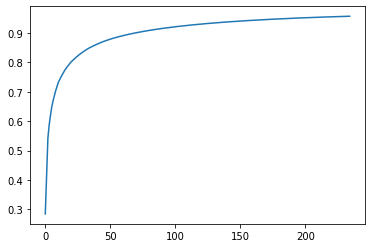

In [42]:
plt.plot(np.cumsum(ratio_var));

In [43]:
pca_final=PCA(n_components=207)
    
X_reduced=pca_final.fit_transform(newdata)

In [89]:
std_X=newdata.std()

In [109]:
#scree=pca_final.explained_variance_/std_X**2
scree=pca_final.explained_variance_ratio_

In [111]:
import plotly.express as px

PC_values = np.arange(pca_final.n_components_)+1



fig = px.scatter(x=PC_values,y=pca_final.explained_variance_ratio_)
fig.show()


#PC_values = np.arange(pca_final.n_components_) + 1
#plt.plot(PC_values, pca_final.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
#plt.title('Scree Plot')
#plt.xlabel('Principal Component')
#plt.ylabel('Variance Explained')
#plt.show()

# Agglomerative Clustering

Method : single, complete, average, weighted,centroid,median and ward.

Metric (distance): euclidean, correlation, cosine,mahalanobis, cityblock, hamming.


In [44]:
X_reduced.shape

(23705, 207)

In [142]:
X_re_df=pd.DataFrame(X_reduced)

In [143]:
feat_cols = ['pc'+str(i) for i in range(X_re_df.shape[1])]

In [144]:
X_re_df.columns=feat_cols

In [145]:
#X_re_df.head()

In [117]:
#import dash_bio



#dash_bio.Clustergram(
#    data=X_reduced,  
#    column_labels=list(X_reduced.columns.values),
#    row_labels=list(X_reduced.index),
#    height=800,
#width=700
#)

In [146]:
max_pc=15
X_re_small=X_re_df.iloc[: ,:max_pc]

In [168]:
#X_re_small['Age']=Age
X_re_small['Gender']=Gender.values

In [173]:
def sex(gender): 
    if gender==0 : return 'male'
    else : return 'female'

In [176]:
X_re_small.head()

pc0        pc1        pc2        pc3        pc4       pc5       pc6  \
0   8.110707  17.617201  13.905095  -7.494857  14.896575  1.834883 -8.241356   
1  17.290728  13.248873 -27.146616  -5.102394   3.115078 -6.770912 -8.409215   
2  20.767335 -30.388404  23.311952 -15.151041  -3.975321  8.829119  0.281841   
3   7.416610  -7.598316 -13.006883  -3.800388  -6.651753 -0.903149  0.673100   
4  10.308738  -2.860549  -5.961484  -9.174224 -17.434604 -0.718260 -2.568174   

        pc7       pc8       pc9      pc10      pc11      pc12      pc13  \
0 -0.512026 -5.553987  4.610229  6.177677 -4.585212  5.050305 -0.488545   
1  5.122565  1.804819 -1.276017 -4.832346 -1.286903  3.020041  1.635895   
2 -4.436245  2.049235 -2.574035 -5.053417  1.889873 -5.314907 -5.430556   
3  7.532059  0.486467  9.485240 -5.103530  0.142658 -3.582334  1.559069   
4  6.018314  1.408397  9.803206 -0.360654 -1.523543 -2.757670 -0.485852   

       pc14  Gender     sex  
0 -2.169144       0    male  
1  3.864278       0    male  
2  3.418167       1  female  
3 -0.563418       1  female  
4 -3.431190       1  female

In [175]:
X_re_small['sex']=X_re_small['Gender'].map(sex)

In [184]:
sex=X_re_small.sex.copy()

In [186]:
X_re_small=X_re_small.drop(['Gender','sex'],axis=1)

In [193]:
X_re_small.head()

pc0        pc1        pc2        pc3        pc4       pc5       pc6  \
0   8.110707  17.617201  13.905095  -7.494857  14.896575  1.834883 -8.241356   
1  17.290728  13.248873 -27.146616  -5.102394   3.115078 -6.770912 -8.409215   
2  20.767335 -30.388404  23.311952 -15.151041  -3.975321  8.829119  0.281841   
3   7.416610  -7.598316 -13.006883  -3.800388  -6.651753 -0.903149  0.673100   
4  10.308738  -2.860549  -5.961484  -9.174224 -17.434604 -0.718260 -2.568174   

        pc7       pc8       pc9      pc10      pc11      pc12      pc13  \
0 -0.512026 -5.553987  4.610229  6.177677 -4.585212  5.050305 -0.488545   
1  5.122565  1.804819 -1.276017 -4.832346 -1.286903  3.020041  1.635895   
2 -4.436245  2.049235 -2.574035 -5.053417  1.889873 -5.314907 -5.430556   
3  7.532059  0.486467  9.485240 -5.103530  0.142658 -3.582334  1.559069   
4  6.018314  1.408397  9.803206 -0.360654 -1.523543 -2.757670 -0.485852   

       pc14  
0 -2.169144  
1  3.864278  
2  3.418167  
3 -0.563418  
4 -3.431190

In [202]:
sex=sex.astype('str')

In [205]:
sex.shape

(23705,)

In [203]:
sex.value_counts()

male      12391
female    11314
Name: sex, dtype: int64

In [206]:
sex.value_counts()[0]+sex.value_counts()[1]

23705

In [302]:
X_re_small['Age']=Age.copy()
X_re_small['Age']=X_re_small['Age'].astype('float')

* Single: Minimal intercluster dissimilarity. Compute all pairwise dissimilarities beteen the observations in cluster A and the observations in cluster B, and record the smallest of these dissimilarities. Single linkage can result in extended, trailing clusters in which single observations are fused one at a time. 
* Complete: Maximal intercluster dissimilarity. Compute all pairwise dissimilarity between the observations in cluster A and the observations in cluster B and record the largest of these dissimilarities. 

In [309]:
import sys
sys.setrecursionlimit(1000000)

Why is the distance negative below. 

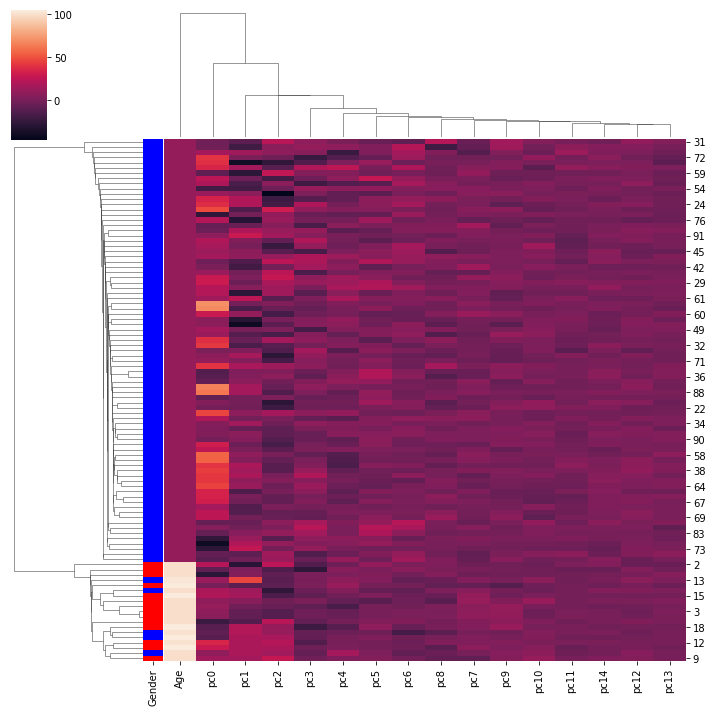

In [315]:
maxrows=100
import seaborn as sns




#g=sns.clustermap(X_re_small,
#                 metric="euclidean",
#                 method="single",
#                 figsize=(10, 8),
#                 row_cluster=False,
#                 dendrogram_ratio=(.1, .2),
#                 cmap="mako")
#                  #cbar_pos=(0, .2, .03, .4))


lut = dict(zip(Gender.unique(), "br"))
row_colors = Gender.map(lut)
g = sns.clustermap(X_re_small[:maxrows], row_colors=row_colors,metric='euclidean', method='single')

In [316]:
#plt.imshow(graydata_center[0],cmap=plt.cm.gray)

In [68]:
example=graydata_center[0].reshape(-1,40000)

In [69]:
example.shape

(1, 40000)

In [70]:

#pca_recon=IncrementalPCA(n_components=70,batch_size=70)
#image_recon = pca_recon.inverse_transform(pca_recon.fit_transform(example))
 
# Plotting the reconstructed image
#plt.imshow(image_recon[1].reshape(200,200),cmap = plt.cm.gray)

def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(example[0].reshape(200,200)))
    return plt.imshow(image_recon,cmap = plt.cm.gray)



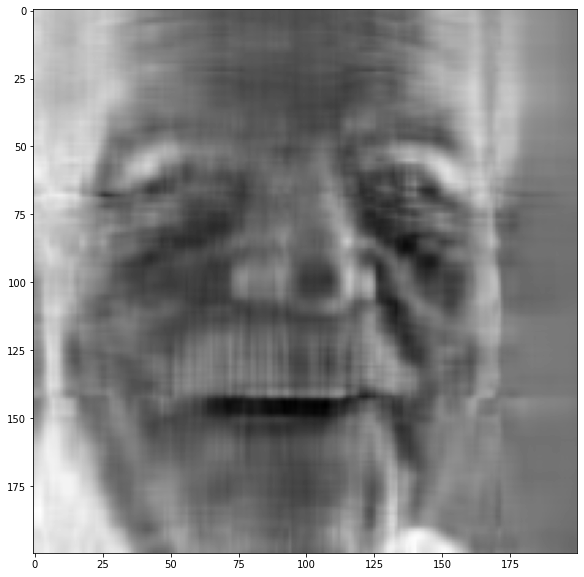

In [71]:

plt.figure(figsize=[10,10])
plot_at_k(10)

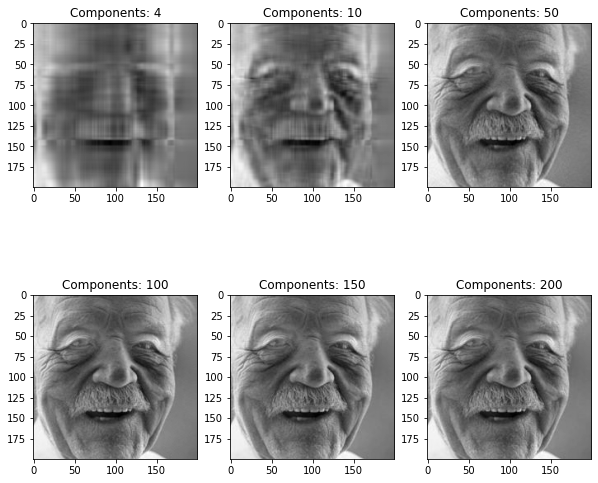

In [72]:
# If I change 200 to 207 which is the number of pc's that gives variance explained 0.95 I get an error. 

ks = [4, 10, 50, 100, 150, 200]
 
plt.figure(figsize=[10,10])
 
for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))
 
plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

# Clustering
* Should age be part of the clustering
* Nearest Neighbor
* Hierchical clustering

In [217]:
from sklearn.cluster import KMeans

In [265]:
kmeans=KMeans(n_clusters=3)
s=kmeans.fit(X_reduced)

In [266]:
s.cluster_centers_

array([[-3.57874521e+00, -1.26774956e+01, -6.82667083e+00,
         3.96762663e-02, -8.82315974e-02, -2.60144690e-02,
        -1.01674824e-01, -6.20043143e-02,  8.68870271e-02,
        -2.78999083e-02, -1.73044996e-01,  1.40043593e-02,
         7.18168847e-02,  6.98296361e-02,  1.18170417e-01,
         3.95663159e-02, -4.19823414e-02,  6.68635626e-03,
        -2.09237586e-02,  2.12689473e-01,  3.50233072e-05,
         2.28629930e-02, -2.06501515e-02, -1.03536803e-02,
        -7.45006802e-02, -1.02662127e-03, -1.12728973e-02,
        -1.83533903e-03,  1.57858802e-02, -5.24636017e-03,
        -3.93495149e-02, -4.93316256e-02,  4.82725801e-02,
        -2.67184234e-02, -5.08870268e-02, -4.21368017e-02,
         2.42748351e-03, -2.67514858e-02,  2.89843590e-02,
        -1.72551226e-03,  1.64393314e-02,  2.70973722e-02,
         4.59780124e-02,  1.18753265e-02, -1.50622676e-03,
         4.80083802e-02, -1.16970871e-02, -3.96140711e-03,
         1.12575667e-02,  3.23931650e-02,  3.19140072e-0

In [267]:
s.labels_

array([2, 2, 2, ..., 2, 0, 2], dtype=int32)

In [268]:
df_reduced=pd.DataFrame(X_reduced)

In [269]:
feat_cols = ['pc'+str(i) for i in range(df_reduced.shape[1])]

In [270]:
df_reduced.columns=feat_cols

In [271]:
df_reduced['clusterlabel']=s.labels_

In [272]:
df_reduced['Age']=Age

In [273]:
df_reduced['Gender']=labels.Gender

In [274]:
df_reduced.head()

pc0        pc1        pc2        pc3        pc4       pc5       pc6  \
0   8.110707  17.617201  13.905095  -7.494857  14.896575  1.834883 -8.241356   
1  17.290728  13.248873 -27.146616  -5.102394   3.115078 -6.770912 -8.409215   
2  20.767335 -30.388404  23.311952 -15.151041  -3.975321  8.829119  0.281841   
3   7.416610  -7.598316 -13.006883  -3.800388  -6.651753 -0.903149  0.673100   
4  10.308738  -2.860549  -5.961484  -9.174224 -17.434604 -0.718260 -2.568174   

        pc7       pc8       pc9  ...     pc200     pc201     pc202     pc203  \
0 -0.512026 -5.553987  4.610229  ... -0.028329 -0.288480 -0.902143 -0.226774   
1  5.122565  1.804819 -1.276017  ... -0.771381  1.099338 -0.170824  1.211289   
2 -4.436245  2.049235 -2.574035  ...  0.455731  0.761000 -1.100480 -0.175315   
3  7.532059  0.486467  9.485240  ... -0.116047  0.109307 -0.284984  0.374025   
4  6.018314  1.408397  9.803206  ...  0.331956 -0.115484 -1.122990  0.832863   

      pc204     pc205     pc206  clusterlabel  Age  Gender  
0 -0.584857  0.566814  0.758130             2  100       0  
1 -0.762390 -1.137710 -0.313181             2  100       0  
2  1.115092 -0.253879  1.216260             2  100       1  
3  0.013825  0.423086  0.748651             0  100       1  
4  1.565025  1.111185  0.328182             0  100       1  

[5 rows x 210 columns]

In [285]:
df_reduced.Age=df_reduced.Age.astype('float')

In [286]:
df_reduced.clusterlabel=df_reduced.clusterlabel.astype('str')

In [291]:
import plotly.express as px
fig = px.scatter(df_reduced, x='pc0', y='pc1', color="clusterlabel", hover_data=['Gender'])
fig.show()

# Silhouette coefficient and diagram

The silhouette coefficient is between -1 and +1. A coefficient close to +1 means that the observation is well inside its own cluster and far from other clusters. A coefficient close 0 that it is close to a cluster boundary. A coefficient clise to -1 means that the observation may have been assigned to the wrong cluster. 

Silhouette diagram each diagram have the shape of a knife. The shape's height indicates the  number of observations the cluster contains. The shapes width is the sorted silhouette coefficients of the observations in the cluster (wider is better). The vertical line is the mean silhoutte coefficient. 

For n_clusters = 2 The average silhouette_score is : 0.16901267664565633
For n_clusters = 3 The average silhouette_score is : 0.12351154960460278
For n_clusters = 4 The average silhouette_score is : 0.1160286928050059
For n_clusters = 5 The average silhouette_score is : 0.11468142836744734
For n_clusters = 6 The average silhouette_score is : 0.10212949763452107
For n_clusters = 7 The average silhouette_score is : 0.09321810786807794
For n_clusters = 8 The average silhouette_score is : 0.087893900049516
For n_clusters = 9 The average silhouette_score is : 0.0849865093305545
For n_clusters = 10 The average silhouette_score is : 0.08005259698297178


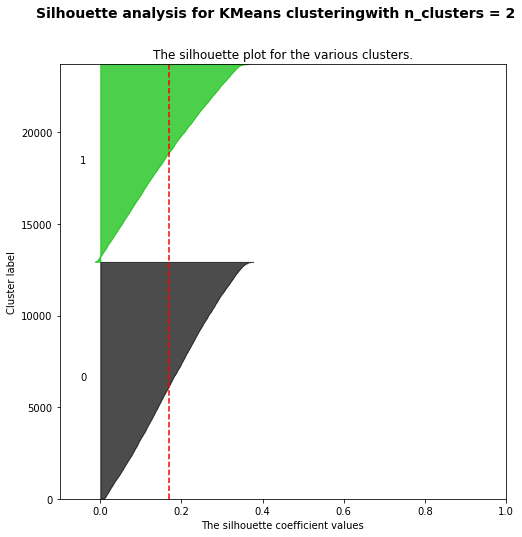

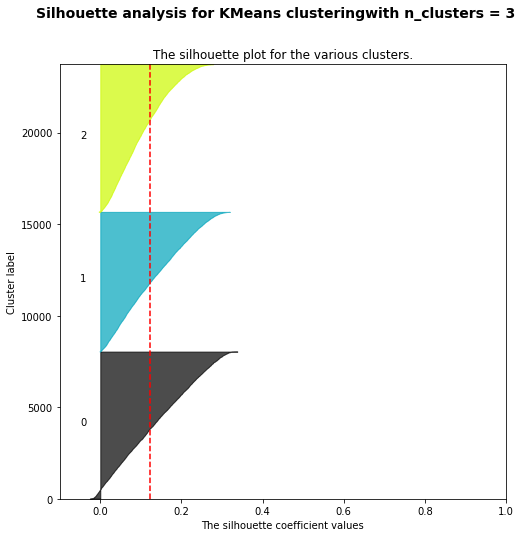

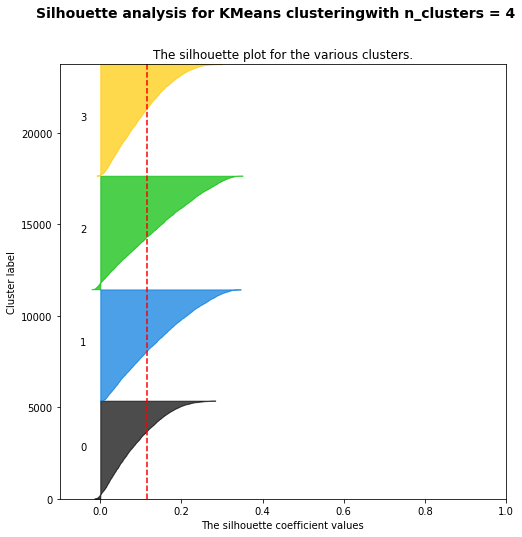

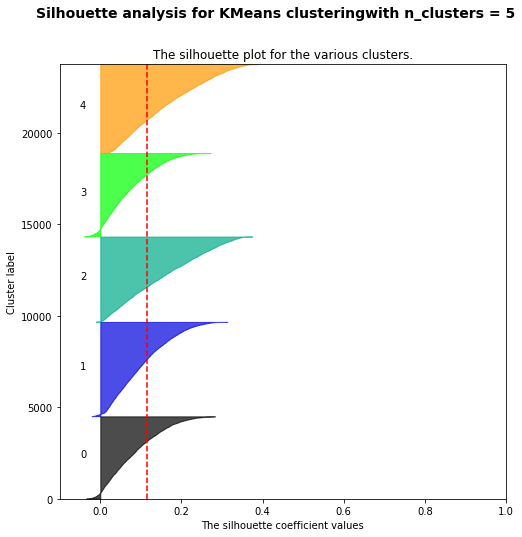

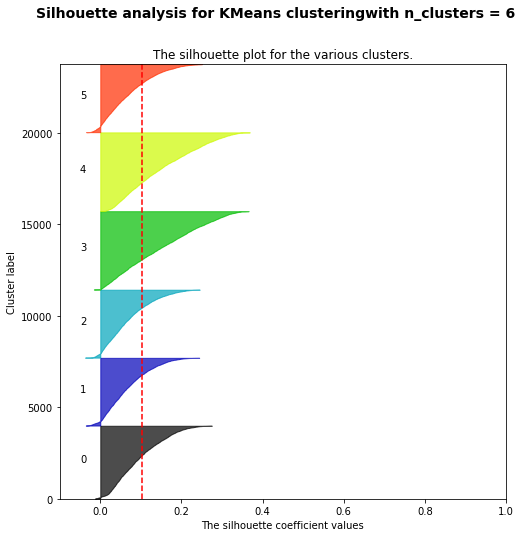

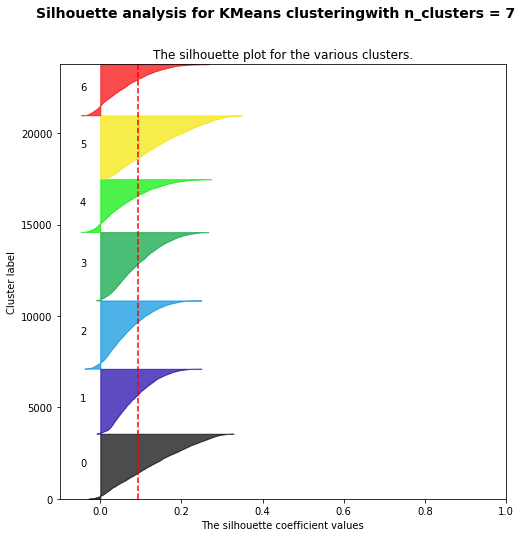

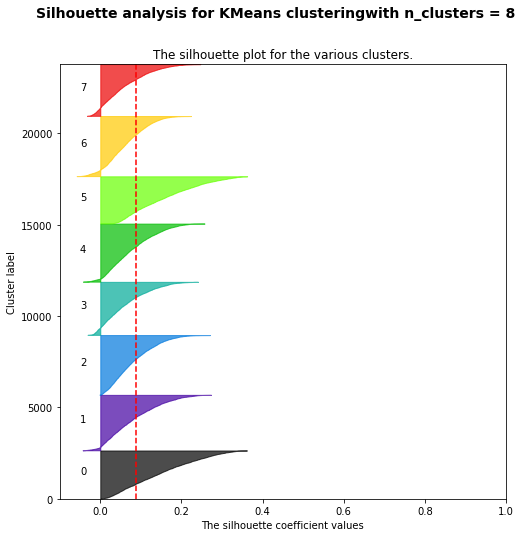

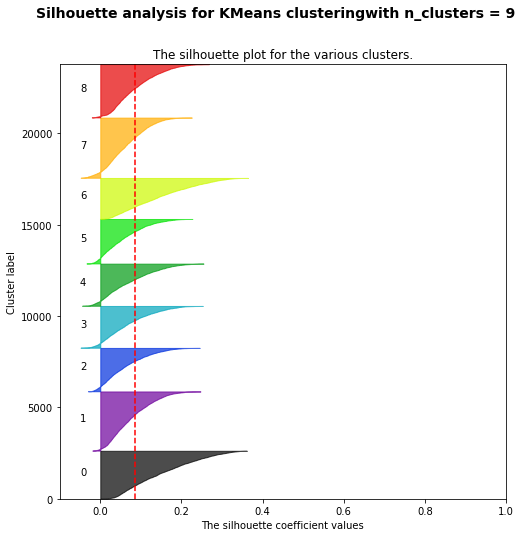

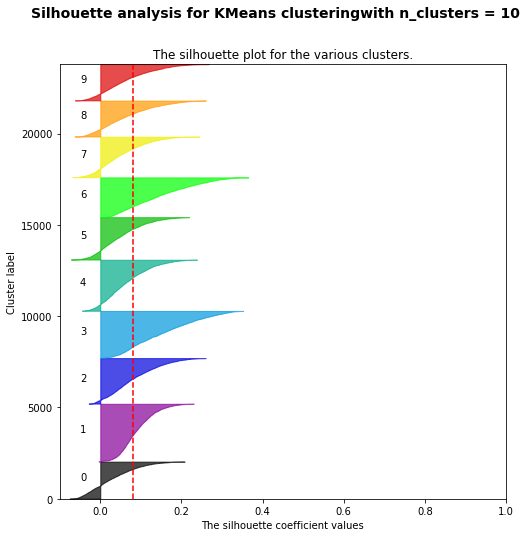

In [340]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
#X = dfscaled.copy()

for n_clusters in range_n_clusters:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_reduced) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_reduced)
    silhouette_avg = silhouette_score(X_reduced, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    
    plt.suptitle(("Silhouette analysis for KMeans clustering"
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Non Negative Matrix Factorization

* X=WH 
* W is the feature matrix
* H is the coefficient matrix

In [339]:
NMF_TRAIN_SIZE = 100000

from sklearn.decomposition import NMF
nmf = NMF(n_components=90, init='random',random_state=0,max_iter=1000)
nmf.fit(gray_nmf[:NMF_TRAIN_SIZE])

/Users/Soren.Johansenc3.ai/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



NMF(init='random', n_components=90, random_state=0)

In [ ]:

# https://scikit-learn.org/stable/modules/decomposition.html#nmf

#W = model.fit_transform(X)
# H = model.components_
# X_new = np.array([[1, 0], [1, 6.1], [1, 0], [1, 4], [3.2, 1], [0, 4]])
# W_new = model.transform(X_new)


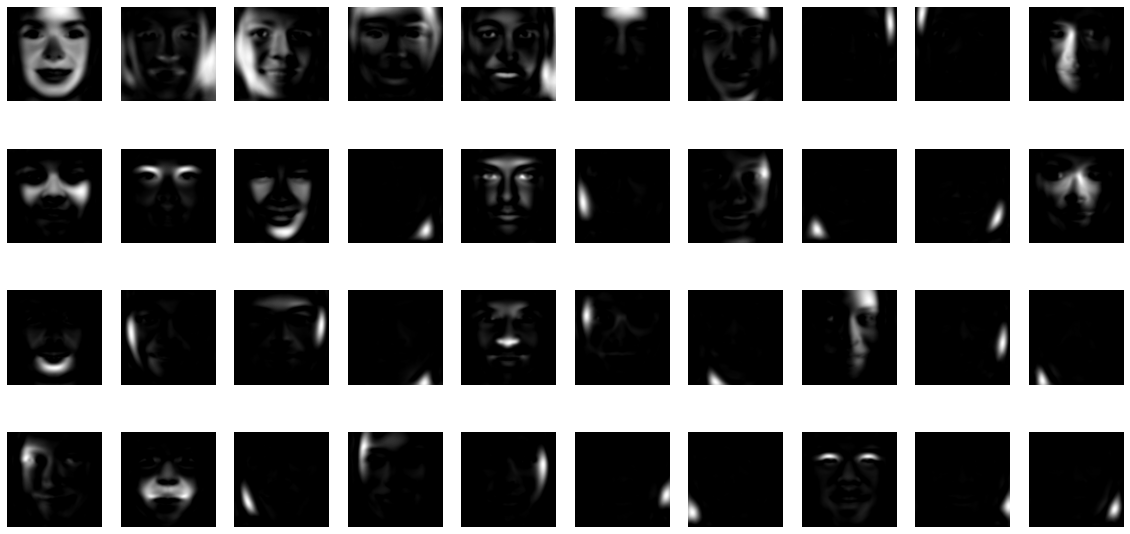

In [74]:
plt.figure(figsize=(20,10))
for k in range(40):
    plt.subplot(4, 10, k + 1)
    plt.imshow(nmf.components_[k].reshape(200,200),cmap = plt.cm.gray)
    plt.axis('off')

In [219]:
#import numpy as np
#import matplotlib.pyplot as plt

#fig = plt.figure(figsize=(8, 8))
#columns = 4
#rows = 4
#for i in range(1, 17):
#    img = image_recon[i]
#    fig.add_subplot(rows, columns, i)
#    plt.imshow(img.reshape(200,200),cmap = plt.cm.gray)
#plt.show()

In [148]:
image_recon.shape

(208, 40000)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, Age, test_size=0.30, random_state=42)

In [83]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [86]:
reg.score(X_train,y_train)

0.48264617838599866

In [84]:
yhat=reg.predict(X_test)

In [85]:
print("RMSE: %.4f" % np.sqrt(np.mean((yhat - y_test.values) ** 2)))

RMSE: 14.2096


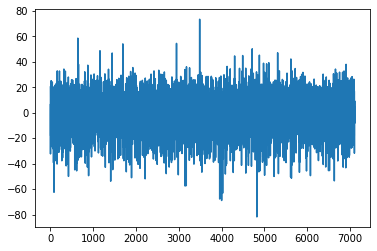

In [92]:
plt.plot(yhat-y_test.values)

In [ ]:
pca_full = PCA(n_components=2)
pca_full.fit(datafull_center)


In [122]:
ratio_var=pca_b.explained_variance_ratio_
#pca_b.explained_variance_ratio_

In [123]:
np.cumsum(ratio_var)

array([0.25830949, 0.41299276, 0.54215488, 0.66769834, 0.71120011,
       0.7501561 , 0.78453025, 0.80791099, 0.8284398 , 0.84619391,
       0.86255985, 0.87446716, 0.88493696, 0.8945564 , 0.90344142,
       0.91114853, 0.91744292, 0.92288276, 0.92777269, 0.93241824,
       0.93696975, 0.94095016, 0.94441781, 0.94773217, 0.95060884,
       0.95331814, 0.9557878 , 0.95817739, 0.96047595, 0.96259137,
       0.96466817, 0.96649033, 0.96819107, 0.96976926, 0.97125423,
       0.97266952, 0.97402617, 0.97533974, 0.97651666, 0.97767093,
       0.97875404, 0.97980541, 0.98081554, 0.98171871, 0.98255759,
       0.98337467, 0.98414443, 0.98488831, 0.98559578, 0.98628425])

In [53]:
cumsum=np.cumsum(inc_pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
print(d)

1


In [29]:
newdata=graydata_center.reshape(-1,40000)

In [30]:
newdata.shape

(23705, 40000)

In [ ]:
pcafull = PCA().fit(newdata)

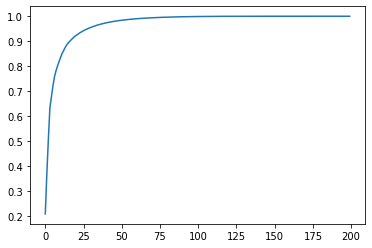

In [126]:
plt.plot(np.cumsum(pcafull.explained_variance_ratio_));

In [129]:
cumsum=np.cumsum(pcafull.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
print(d)

29


In [130]:
# So we can conclude that we can reduce the data from 200*200 to 29 features

In [119]:
#pca_b.singular_values_

In [120]:
#pca_b.explained_variance_ratio_

In [36]:
pca_b.singular_values_.shape

(50,)

In [32]:
pca_b.explained_variance_ratio_.shape

(50,)

<BarContainer object of 50 artists>

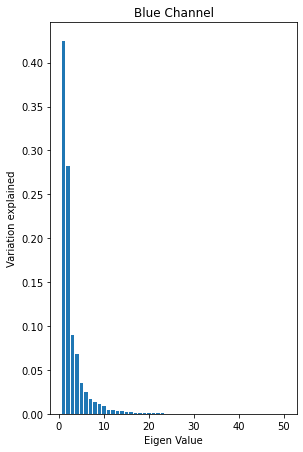

In [46]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)


In [95]:
testpic[:,:,1].reshape(len(testpic[:,:,1]),-1).shape

(200, 200)

In [34]:
lets_see=pd.DataFrame(testpic[:,:,1])

In [35]:
lets_see.shape

(200, 200)

V principal components. U scores and s is....Check this.

In [54]:
def PCA_dim_reduction(X, num_components):

    
    N = len(X)
    
    # Center data
    Xm = X.mean(0)
    Xsd=X.std(0)
    Xc = (X - Xm)/Xsd

    # reduce dimensionality using principal component analysis (PCA) via SVD
    U, s, V = np.linalg.svd(Xc)

    # get eigenvectors corresponding to the two largest eigenvalues
    #eigen_vecs = V[:num_components, :]
    #eigen_vals = s[:num_components]

    # set-up projection matrix
    #Pmat = eigen_vecs.T*(np.sqrt(N)/eigen_vals)
    Pmat=np.dot(Xc,V)
    # project and standize
    return Pmat,U,s,V


In [55]:
p,U,s,V=PCA_dim_reduction(blue_pic,50)

In [52]:
#s

In [65]:
#np.matmul(U,s)

In [89]:
s.shape

(200,)

# Simple case to understand SVD and sklearn PCA

In [28]:
USarrets=pd.read_csv('USArrests.csv',sep=',')

In [30]:
USarrets.columns=['State','Murder','Assualt','UrbanPop','Rape']

In [31]:
USarrets.head()

State  Murder  Assualt  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [35]:
US_new=USarrets.drop('State',axis=1)

In [37]:
#US_new.head()

In [56]:
p,U,s,V=PCA_dim_reduction(US_new,4)

In [64]:
# These are the standard deviations / singular values
s

array([11.02414792,  6.9640859 ,  4.17990381,  2.91514567])

In [63]:
print('Data dim',US_new.shape)
print('p dim',p.shape)
print('U dim',U.shape)
print('s dim',s.shape)
print('V dim',V.shape)

Data dim (50, 4)
p dim (50, 4)
U dim (50, 50)
s dim (4,)
V dim (4, 4)


In [115]:
# This is the principal component loadings vector. Rows=p features, and columns are the pc1 - pc4.
# 
-V

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [ 0.34123273,  0.26814843,  0.37801579, -0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

In [114]:
# This is the reduced/ projected data set with 4 pc.
US_centered.dot(-V.T)

0         1         2         3
0   0.975660 -1.122001  0.439804 -0.154697
1   1.930538 -1.062427 -2.019500  0.434175
2   1.745443  0.738460 -0.054230  0.826264
3  -0.139999 -1.108542 -0.113422  0.180974
4   2.498613  1.527427 -0.592541  0.338559
5   1.499341  0.977630 -1.084002 -0.001450
6  -1.344992  1.077984  0.636793  0.117279
7   0.047230  0.322089  0.711410  0.873113
8   2.982760 -0.038834  0.571032  0.095317
9   1.622807 -1.266088  0.339018 -1.065974
10 -0.903484  1.554676 -0.050272 -0.893733
11 -1.623319 -0.208853 -0.257190  0.494088
12  1.365052  0.674988  0.670686  0.120795
13 -0.500381  0.150039 -0.225763 -0.420398
14 -2.230996  0.103008 -0.162910 -0.017379
15 -0.788872  0.267449 -0.025296 -0.204421
16 -0.743313 -0.948807  0.028084 -0.663817
17  1.549091 -0.862300  0.775606 -0.450158
18 -2.372740 -0.372609  0.065022  0.327139
19  1.745647 -0.423357  0.155670  0.553451
20 -0.481280  1.459677  0.603372  0.177794
21  2.087250  0.153835 -0.381000 -0.101343
22 -1.675670  0.625907 -0.151532 -0.066640
23  0.986479 -2.369737  0.733363 -0.213342
24  0.689784  0.260708 -0.373650 -0.223555
25 -1.173538 -0.531479 -0.244408 -0.122499
26 -1.252916  0.192004 -0.173809 -0.015733
27  2.845505  0.767805 -1.151688 -0.311354
28 -2.359956  0.017901 -0.036485  0.032804
29  0.179741  1.434937  0.756770 -0.240937
30  1.960124 -0.141413 -0.181846  0.336121
31  1.665667  0.814911  0.636612  0.013349
32  1.112088 -2.205611  0.854892  0.944790
33 -2.962152 -0.593097 -0.298249  0.251435
34 -0.223694  0.734778  0.030826 -0.469153
35 -0.308649  0.284961  0.015156 -0.010228
36  0.058528  0.535970 -0.930387  0.235391
37 -0.879487  0.565361  0.396602 -0.355452
38 -0.855091  1.476983  1.356177  0.607403
39  1.307450 -1.913973  0.297517  0.130145
40 -1.967797 -0.815068 -0.385381  0.108471
41  0.989694 -0.851605 -0.186193 -0.646303
42  1.341518  0.408335  0.487123 -0.636731
43 -0.545032  1.456715 -0.290776  0.081487
44 -2.773256 -1.388194 -0.832808  0.143434
45 -0.095367 -0.197728 -0.011595 -0.209246
46 -0.214723  0.960374 -0.618591  0.218628
47 -2.087393 -1.410526 -0.103722 -0.130583
48 -2.058812  0.605125  0.137469 -0.182253
49 -0.623101 -0.317787  0.238240  0.164977

Sklearn PCA method

In [72]:
US_m=US_new.mean(0)
US_sd=US_new.std(0)
US_centered=(US_new-US_m)/US_sd

In [78]:
pca_US = PCA(n_components=4)
pca_US.fit(US_centered)


PCA(n_components=4)

In [75]:
# This is the principal component loadings vector. Rows=p features, and columns are the pc1 - pc4.
pca_US.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [76]:
pca_US.singular_values_

array([11.02414792,  6.9640859 ,  4.17990381,  2.91514567])

In [111]:
# Transformed reduced down to 4 dimensions. 
newdata=pca_US.transform(US_centered)
newdata=pd.DataFrame(newdata, columns=['pc1','pc2','pc3','pc4'])

In [112]:
newdata.head()

pc1       pc2       pc3       pc4
0  0.975660  1.122001 -0.439804  0.154697
1  1.930538  1.062427  2.019500 -0.434175
2  1.745443 -0.738460  0.054230 -0.826264
3 -0.139999  1.108542  0.113422 -0.180974
4  2.498613 -1.527427  0.592541 -0.338559

In [86]:
ratio_var=pca_US.explained_variance_ratio_
pca_US.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [83]:
np.cumsum(ratio_var)

array([0.62006039, 0.86750168, 0.95664248, 1.        ])

In [79]:
pca = PCA().fit(US_centered)

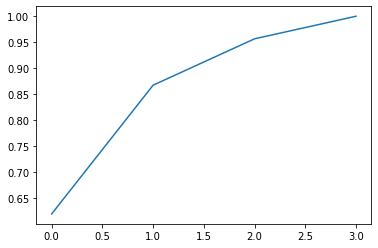

In [80]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [84]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

In [85]:
d

3